**Business Problem**


To analyze and generate the insights of netflix movies/ tv shows to increase the business across different countries and genres

1. **Defining Problem Statement and Analysing basic metrics**


In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

netflix = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/d2beiqkhq929f0.cloudfront.net_public_assets_assets_000_000_940_original_netflix.csv')
netflix
netflix.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


**2.Observations on the shape of data, data types of all the attributes, conversion of categorical attributes to 'category' (If required), missing value detection, statistical summary**

In [2]:
netflix.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [3]:
len(netflix)

8807

data basic metrics

In [4]:
netflix.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [5]:
netflix.describe()

,release_year
count,8807.000000
mean,2014.180198
std,8.819312
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


In [6]:
netflix.nunique()

show_id         8807
type               2
title           8807
director        4528
cast            7692
country          748
date_added      1767
release_year      74
rating            17
duration         220
listed_in        514
description     8775
dtype: int64

**Finding and Handling Null Values**

Process of finding , cleaning, analyzing the missing values of data and providing the correctly formated data for further analysis is the major part of the Data cleaning process.

In [7]:
## Finding NA count

netflix.isna().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64


Here, we can identify that out of 8807 entries,
director has the most missing entries, followed by country, cast and rating and duration to the lowest.

In [8]:
netflix['rating'].value_counts()

TV-MA       3207
TV-14       2160
TV-PG        863
R            799
PG-13        490
TV-Y7        334
TV-Y         307
PG           287
TV-G         220
NR            80
G             41
TV-Y7-FV       6
NC-17          3
UR             3
74 min         1
84 min         1
66 min         1
Name: rating, dtype: int64

In [9]:
netflix['director']=netflix['director'].str.split(",")
netflix["country"]= netflix["country"].str.split(",")
netflix["cast"]=netflix["cast"].str.split(",")
netflix["listed_in"] =netflix["listed_in"].str.split(",")
netflix.head(5)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,[Kirsten Johnson],NaN,[United States],"September 25, 2021",2020,PG-13,90 min,[Documentaries],"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"[Ama Qamata, Khosi Ngema, Gail Mabalane, Th...",[South Africa],"September 24, 2021",2021,TV-MA,2 Seasons,"[International TV Shows, TV Dramas, TV Myste...","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,[Julien Leclercq],"[Sami Bouajila, Tracy Gotoas, Samuel Jouy, ...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"[Crime TV Shows, International TV Shows, TV ...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"[Docuseries, Reality TV]","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"[Mayur More, Jitendra Kumar, Ranjan Raj, Al...",[India],"September 24, 2021",2021,TV-MA,2 Seasons,"[International TV Shows, Romantic TV Shows, ...",In a city of coaching centers known to train I...


exploding the data to individual rows based on the multiple supported entries for further data imputation

In [10]:
#exploding data into new columns

def explode_columns(row):
  row['director']= pd.Series(row['director']).explode()
  row['cast']= pd.Series(row['cast']).explode()
  row['country']= pd.Series(row['country']).explode()
  row['listed_in']= pd.Series(row['listed_in']).explode()
  return row

df_netflix_explode = netflix.apply(explode_columns, axis=1).explode('director').explode('cast').explode('country').explode('listed_in').reset_index(drop=True)
df_netflix_explode.head(5)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,Ama Qamata,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,International TV Shows,"After crossing paths at a party, a Cape Town t..."
2,s2,TV Show,Blood & Water,NaN,Ama Qamata,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,TV Dramas,"After crossing paths at a party, a Cape Town t..."
3,s2,TV Show,Blood & Water,NaN,Ama Qamata,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,TV Mysteries,"After crossing paths at a party, a Cape Town t..."
4,s2,TV Show,Blood & Water,NaN,Khosi Ngema,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,International TV Shows,"After crossing paths at a party, a Cape Town t..."


In [11]:
## Replacing nan values using imputation method
# Data after handling the cast,Directors, country,listed_in
# Rating cannot be fullfilled based on the otherdata. so it will be filled with NR('Not Rated')
df_netflix_explode['director']=df_netflix_explode.director.fillna('Unknown Director')
df_netflix_explode['cast']=df_netflix_explode.cast.fillna('Unknown Actors')
df_netflix_explode['listed_in']=df_netflix_explode.listed_in.fillna('Not Listed')
df_netflix_explode.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unknown Actors,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,Unknown Director,Ama Qamata,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,International TV Shows,"After crossing paths at a party, a Cape Town t..."
2,s2,TV Show,Blood & Water,Unknown Director,Ama Qamata,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,TV Dramas,"After crossing paths at a party, a Cape Town t..."
3,s2,TV Show,Blood & Water,Unknown Director,Ama Qamata,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,TV Mysteries,"After crossing paths at a party, a Cape Town t..."
4,s2,TV Show,Blood & Water,Unknown Director,Khosi Ngema,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,International TV Shows,"After crossing paths at a party, a Cape Town t..."


Filling out the NAN data across the director, cast and listed_in columns,as the data imputation can be wrong based on one factor the missing values cannot be determined which means analysis might get wrong
.

In [12]:
#Data after Handling the null data
df_netflix_explode.isna().sum()

show_id             0
type                0
title               0
director            0
cast                0
country         11897
date_added        158
release_year        0
rating             67
duration            3
listed_in           0
description         0
dtype: int64

Filling the remaining null value columns, country, date_added, rating based on the mode imputation method which gives the highest occurences of a value in a column.

For rating the imputation cannot be predicted.So, the NAN values will be replaced as Not-Rated(NR)

In [13]:
# ratings cannot be min so ratings will be filling with Not-Rated(NR)
df_netflix_explode['rating']=df_netflix_explode.rating.fillna('NR')

In [14]:
df_netflix_explode.isna().sum()

show_id             0
type                0
title               0
director            0
cast                0
country         11897
date_added        158
release_year        0
rating              0
duration            3
listed_in           0
description         0
dtype: int64

In [15]:
#dateadded cannot be imputed manually.. so the mode of release year will be imputed to dateadded
for i in df_netflix_explode[df_netflix_explode['date_added'].isnull()]['release_year'].unique():
  imp=df_netflix_explode[df_netflix_explode['release_year']==i]['date_added'].mode().values[0]
  df_netflix_explode.loc[df_netflix_explode['release_year']==i,'date_added']=df_netflix_explode.loc[df_netflix_explode['release_year']==i,'date_added'].fillna(imp)

In [ ]:
df_netflix_explode.isna().sum()

show_id             0
type                0
title               0
director            0
cast                0
country         11897
date_added          0
release_year        0
rating              0
duration            3
listed_in           0
description         0
dtype: int64

In [16]:
#country column is imputed on the basis of director
for i in df_netflix_explode[df_netflix_explode['country'].isnull()]['director'].unique():
  if i in df_netflix_explode[~df_netflix_explode['country'].isnull()]['director'].unique():
      imp=df_netflix_explode[df_netflix_explode['director']==i]['country'].mode().values[0]
      df_netflix_explode.loc[df_netflix_explode['director']==i,'country']=df_netflix_explode.loc[df_netflix_explode['director']==i,'country'].fillna(imp)

In [ ]:
df_netflix_explode.isna().sum()

show_id            0
type               0
title              0
director           0
cast               0
country         2455
date_added         0
release_year       0
rating             0
duration           3
listed_in          0
description        0
dtype: int64

In [17]:
#country column is imputed on the basis of cast
for i in df_netflix_explode[df_netflix_explode['country'].isnull()]['cast'].unique():
  if i in df_netflix_explode[~df_netflix_explode['country'].isnull()]['cast'].unique():
      imp=df_netflix_explode[df_netflix_explode['cast']==i]['country'].mode().values[0]
      df_netflix_explode.loc[df_netflix_explode['cast']==i,'country']=df_netflix_explode.loc[df_netflix_explode['cast']==i,'country'].fillna(imp)

In [ ]:
df_netflix_explode.isna().sum()

show_id            0
type               0
title              0
director           0
cast               0
country         2455
date_added         0
release_year       0
rating             0
duration           3
listed_in          0
description        0
dtype: int64

In [18]:
#still null country columns are replaced by unavailable-COuntries
df_netflix_explode['country']=df_netflix_explode.country.fillna('Country-Unavailable')
df_netflix_explode.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unknown Actors,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,Unknown Director,Ama Qamata,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,International TV Shows,"After crossing paths at a party, a Cape Town t..."
2,s2,TV Show,Blood & Water,Unknown Director,Ama Qamata,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,TV Dramas,"After crossing paths at a party, a Cape Town t..."
3,s2,TV Show,Blood & Water,Unknown Director,Ama Qamata,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,TV Mysteries,"After crossing paths at a party, a Cape Town t..."
4,s2,TV Show,Blood & Water,Unknown Director,Khosi Ngema,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,International TV Shows,"After crossing paths at a party, a Cape Town t..."


In [19]:
#duration cannot be min so it wiill be replced with the rating column
df_netflix_explode.loc[df_netflix_explode['duration'].isnull(),'duration']=df_netflix_explode.loc[df_netflix_explode['duration'].isnull(),'duration'].fillna(df_netflix_explode['rating'])
df_netflix_explode.isnull().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

**3.Non-Graphical Analysis: Value counts and unique attributes ​​**

In [20]:
df_netflix_explode['duration'].value_counts()
df_netflix_explode['duration']=df_netflix_explode['duration'].str.replace(" min","")
df_netflix_explode['duration']=df_netflix_explode['duration'].str.replace(" Seasons","")
df_netflix_explode['duration'].unique()

array(['90', '2', '1 Season', '91', '125', '9', '104', '127', '4', '67',
       '94', '5', '161', '61', '166', '147', '103', '97', '106', '111',
       '3', '110', '105', '96', '124', '116', '98', '23', '115', '122',
       '99', '88', '100', '6', '102', '93', '95', '85', '83', '113', '13',
       '182', '48', '145', '87', '92', '80', '117', '128', '119', '143',
       '114', '118', '108', '63', '121', '142', '154', '120', '82', '109',
       '101', '86', '229', '76', '89', '156', '112', '107', '129', '135',
       '136', '165', '150', '133', '70', '84', '140', '78', '7', '64',
       '59', '139', '69', '148', '189', '141', '130', '138', '81', '132',
       '10', '123', '65', '68', '66', '62', '74', '131', '39', '46', '38',
       '8', '17', '126', '155', '159', '137', '12', '273', '36', '34',
       '77', '60', '49', '58', '72', '204', '212', '25', '73', '29', '47',
       '32', '35', '71', '149', '33', '15', '54', '224', '162', '37',
       '75', '79', '55', '158', '164', '173', '181

In [21]:
df_netflix_explode_final= df_netflix_explode.copy()
df_netflix_explode_final.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unknown Actors,United States,"September 25, 2021",2020,PG-13,90,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,Unknown Director,Ama Qamata,South Africa,"September 24, 2021",2021,TV-MA,2,International TV Shows,"After crossing paths at a party, a Cape Town t..."
2,s2,TV Show,Blood & Water,Unknown Director,Ama Qamata,South Africa,"September 24, 2021",2021,TV-MA,2,TV Dramas,"After crossing paths at a party, a Cape Town t..."
3,s2,TV Show,Blood & Water,Unknown Director,Ama Qamata,South Africa,"September 24, 2021",2021,TV-MA,2,TV Mysteries,"After crossing paths at a party, a Cape Town t..."
4,s2,TV Show,Blood & Water,Unknown Director,Khosi Ngema,South Africa,"September 24, 2021",2021,TV-MA,2,International TV Shows,"After crossing paths at a party, a Cape Town t..."


In [22]:
df_netflix_explode_final['duration_without_season']= df_netflix_explode['duration'].copy()
df_netflix_explode_final.loc[df_netflix_explode_final['duration_without_season'].str.contains(' Season'),'duration_without_season']=0
df_netflix_explode_final['duration_without_season']=df_netflix_explode_final['duration_without_season'].astype(int)
df_netflix_explode_final['duration_without_season'].describe()

count    202065.000000
mean         77.514443
std          51.740741
min           0.000000
25%           4.000000
50%          95.000000
75%         112.000000
max         312.000000
Name: duration_without_season, dtype: float64

**4. Visual Analysis - Univariate, Bivariate after pre-processing of the data**

In [23]:
df_netflix_explode_final.head(5)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,duration_without_season
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unknown Actors,United States,"September 25, 2021",2020,PG-13,90,Documentaries,"As her father nears the end of his life, filmm...",90
1,s2,TV Show,Blood & Water,Unknown Director,Ama Qamata,South Africa,"September 24, 2021",2021,TV-MA,2,International TV Shows,"After crossing paths at a party, a Cape Town t...",2
2,s2,TV Show,Blood & Water,Unknown Director,Ama Qamata,South Africa,"September 24, 2021",2021,TV-MA,2,TV Dramas,"After crossing paths at a party, a Cape Town t...",2
3,s2,TV Show,Blood & Water,Unknown Director,Ama Qamata,South Africa,"September 24, 2021",2021,TV-MA,2,TV Mysteries,"After crossing paths at a party, a Cape Town t...",2
4,s2,TV Show,Blood & Water,Unknown Director,Khosi Ngema,South Africa,"September 24, 2021",2021,TV-MA,2,International TV Shows,"After crossing paths at a party, a Cape Town t...",2


In [24]:
from datetime import datetime
from dateutil.parser import parse
arr=[]
for i in df_netflix_explode_final['date_added'].values:
  dt1=parse(i)
  arr.append(dt1.strftime('%Y-%m-%d'))
df_netflix_explode_final['Modified_Added_date'] =arr
df_netflix_explode_final['Modified_Added_date']=pd.to_datetime(df_netflix_explode_final['Modified_Added_date'])
df_netflix_explode_final['month_added']=df_netflix_explode_final['Modified_Added_date'].dt.month
df_netflix_explode_final['week_Added']=df_netflix_explode_final['Modified_Added_date'].dt.week
df_netflix_explode_final['year']=df_netflix_explode_final['Modified_Added_date'].dt.year
df_netflix_explode_final.head(5)

<ipython-input-24-b39d22461009>:10: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  df_netflix_explode_final['week_Added']=df_netflix_explode_final['Modified_Added_date'].dt.week


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,duration_without_season,Modified_Added_date,month_added,week_Added,year
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unknown Actors,United States,"September 25, 2021",2020,PG-13,90,Documentaries,"As her father nears the end of his life, filmm...",90,2021-09-25,9,38,2021
1,s2,TV Show,Blood & Water,Unknown Director,Ama Qamata,South Africa,"September 24, 2021",2021,TV-MA,2,International TV Shows,"After crossing paths at a party, a Cape Town t...",2,2021-09-24,9,38,2021
2,s2,TV Show,Blood & Water,Unknown Director,Ama Qamata,South Africa,"September 24, 2021",2021,TV-MA,2,TV Dramas,"After crossing paths at a party, a Cape Town t...",2,2021-09-24,9,38,2021
3,s2,TV Show,Blood & Water,Unknown Director,Ama Qamata,South Africa,"September 24, 2021",2021,TV-MA,2,TV Mysteries,"After crossing paths at a party, a Cape Town t...",2,2021-09-24,9,38,2021
4,s2,TV Show,Blood & Water,Unknown Director,Khosi Ngema,South Africa,"September 24, 2021",2021,TV-MA,2,International TV Shows,"After crossing paths at a party, a Cape Town t...",2,2021-09-24,9,38,2021


**Univariate Analysis**

Analysis done based on a single variable and doesnot involve major math operations.

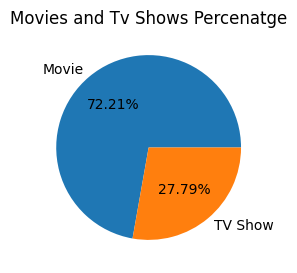

In [25]:
# Comparison of tv shows vs. movies.
plt.figure(figsize=(5,3))
plt.title("Movies and Tv Shows Percenatge")
plt.pie(df_netflix_explode_final.type.value_counts(),
        labels=df_netflix_explode_final.type.value_counts().index,
        autopct='%.2f%%')
plt.show()

 Determines that on the overall types in netflix, 72.21% are under movies category and 27.79% are under TV Show Category

In [26]:
df_netflix_explode_final["year_added"] = pd.to_datetime(df_netflix_explode_final.date_added).dt.year
df_netflix_explode_final["year_added"]

0         2021
1         2021
2         2021
3         2021
4         2021
          ... 
202060    2019
202061    2019
202062    2019
202063    2019
202064    2019
Name: year_added, Length: 202065, dtype: int64

In [27]:
df_netflix_explode_final_movies= df_netflix_explode_final[df_netflix_explode_final.type=='Movie']
df_movies=df_netflix_explode_final_movies.year_added.value_counts().reset_index().rename(columns={"index":"year","year_added":"count"})
df_movies

,year,count
0,2019,34473
1,2020,32488
2,2018,28050
3,2021,25709
4,2017,18252
5,2016,4858
6,2015,1125
7,2011,438
8,2014,345
9,2013,75


In [28]:
df_netflix_explode_final_tvshow= df_netflix_explode_final[df_netflix_explode_final.type=='TV Show']
df_show=df_netflix_explode_final_tvshow.year_added.value_counts().reset_index().rename(columns={"index":"year","year_added":"count"})
df_show

,year,count
0,2020,13563
1,2019,12587
2,2021,10850
3,2018,7736
4,2017,6981
5,2016,3756
6,2015,435
7,2013,132
8,2014,107
9,2008,1


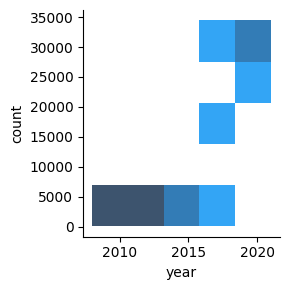

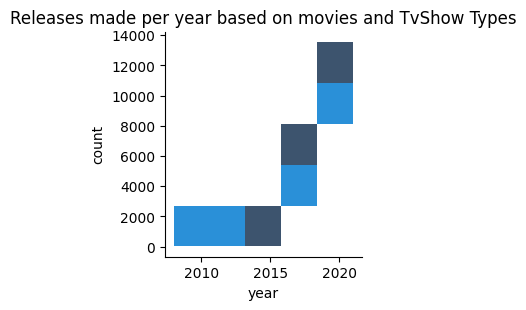

In [51]:
#How has the number of movies released per year changed over the last 20-30 years
# plt.subplots(figsize=(3, 5))
sns.displot(data=df_movies, x='year', y='count',height=3)
sns.displot (data=df_show, x='year', y='count',height=3)
# ax.set_xticks((2000,2020,1))
plt.title("Releases made per year based on movies and TvShow Types")
plt.show()

In [35]:
import plotly.graph_objects as go
from plotly.offline import init_notebook_mode, iplot
import plotly.express as px

country_counts = df_netflix_explode_final['country'].str.strip().value_counts()
country_counts=country_counts[country_counts!='Country-Unavailable']
# Get the top 5 countries
top_5_countries = country_counts
top_5_countries
# # Create a custom color scale
colors = px.colors.qualitative.Set1

# Create a Choropleth plot with distinct colors
fig = go.Figure()

fig.add_trace(go.Choropleth(
    locationmode='country names',
    locations=top_5_countries.index,
    z=top_5_countries.values,
    colorscale=colors,
    showscale=True
))

# Customize the layout
fig.update_geos(showcoastlines=True)  # Show country boundaries
fig.update_coloraxes(colorbar_title="Count")

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'Martin Scorsese'),
  Text(1, 0, 'Youssef Chahine'),
  Text(2, 0, 'Cathy Garcia-Molina'),
  Text(3, 0, 'Steven Spielberg'),
  Text(4, 0, 'Lars von Trier'),
  Text(5, 0, 'Raja Gosnell'),
  Text(6, 0, 'Tom Hooper'),
  Text(7, 0, 'McG'),
  Text(8, 0, 'David Dhawan'),
  Text(9, 0, 'Wilson Yip')])

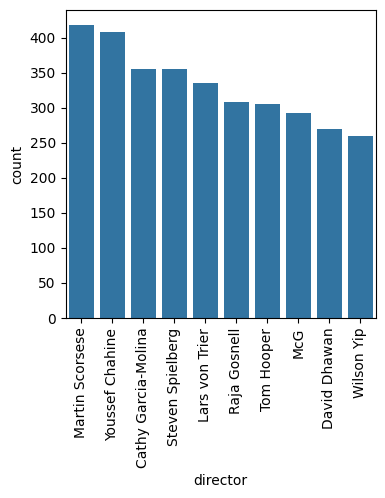

In [47]:
df_netflix_country = df_netflix_explode_final[df_netflix_explode_final.director!='Unknown Director']
# df_netflix_country.director.value_counts()

plt.figure(figsize=(4,4))
sns.countplot(x=df_netflix_country.director,order=df_netflix_country.director.value_counts().index[:10])
plt.xticks(rotation=90)

This determines that the majority of the movies directed in netflix is in the above order.

**Bi-Variate Analysis**
The main purpose of bivariate analysis is to understand the relationship between 2 variables.



For this we can do a distribution analysis over the duration between TV Shows and Movies.
This can be analysed by use of box plot between duration of tvshows and movies and check the max data plotted between the range and also we can get the count of outliers

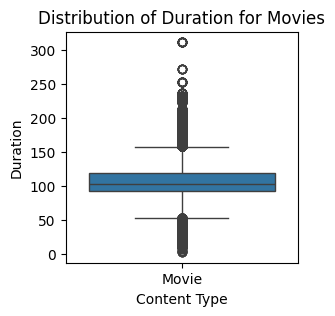

In [31]:
plt.figure(figsize=(3,3))
sns.boxplot(data=df_netflix_explode_final_movies, x='type', y='duration_without_season')
plt.xlabel('Content Type')
plt.ylabel('Duration')
plt.title('Distribution of Duration for Movies')
plt.show()

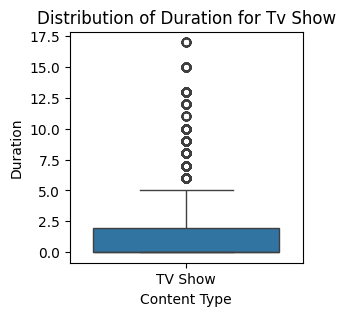

In [52]:
plt.figure(figsize=(3,3))
sns.boxplot(data=df_netflix_explode_final_tvshow, x='type', y='duration_without_season')
plt.xlabel('Content Type')
plt.ylabel('Duration')
plt.title('Distribution of Duration for Tv Show')
plt.show()

By analysing the box plot of movies and TV shows it is clear that the majority of the movies are execeeding the play duration and also getting failes with the average range of a movie play.

For the TV Shows many of the shows are shown to be more than 5 seasons and maximum range of the number of seasons are 4-5 and minimum quartile range of seasons is closer to 2-3

This clearly shows that the netflix majorly focus on the shorter series and average duration of movies marking upto 2.5 hrs

**5. Missing Value & Outlier check (Treatment optional)**


1. Missing values and outliers are common data quality issues that need to be addressed when working with datasets in Python. Ways/Methods to handle them are given below
---
**Missing Values:**
Missing values are data points that are not present in a dataset, often represented as NaN (Not-a-Number) or None in Python. Dealing with missing values is crucial as they can affect the quality of your analysis and modeling.
1. **Identify Missing Values:** You can use the isnull() or isna() method in pandas to identify missing values in your DataFrame
2.**Count Missing Values:** To count the number of missing values in each column, you can use the sum() function
3. **Handle Missing Values:**
There are several ways to handle missing values.
          1. Remove Rows
          2. Imputations
---
**Outliers**:
Outliers are data points that significantly differ from other data points in a dataset. Detecting and addressing outliers is important to prevent them from skewing your analysis or model's performance.
1. **Visual Inspection:**
You can start by visualizing your data using box plots or histograms to identify potential outliers. The matplotlib library is commonly used for this purpose.
2. **Statistical Methods:**
You can use statistical methods to detect outliers, such as the z-score o
Z-Score: Calculate the z-score for each data point and flag those with a z-score above a certain threshold as outliers
3. **Handle Outliers:**
Depending on the context and the nature of your data, you can choose to:

Remove outliers if they are due to data entry errors or unlikely values.
Transform data using techniques like log transformation to mitigate the impact of outliers.
Keep outliers if they represent important information or genuine data points.
Handling outliers depends on your specific analysis or modeling goals and should be done carefully.